In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# We're using Tensorflow 2, which can be installed with 'pip install tensorflow'
import tensorflow as tf

# Documentation: https://keras.io/api/
from tensorflow import keras

# Requirements

- Choose a classification or regression problem
- Split your dataset into train/test/validation subsets
- Train, evaluate and compare different neural network models using Tensorflow 2 / Keras
- Interpret results

# Dataset

Data source: https://www.kaggle.com/ueslei/ucs-satellite-database

In [29]:
df = pd.read_csv('../2_EDA/ucs-satellite-database/UCS_Satellite_Database_12-1-2018-1.csv',
    engine='python', decimal=',', thousands='.', parse_dates=['Date of Launch'], dayfirst=True)

# Remove some columns
df.drop(df.columns[df.columns.tolist().index('Comments')+1:], axis=1, inplace=True)

# Type conversions
df['Eccentricity'] = df['Eccentricity'].replace(',', '.', regex=True).astype(float)
df['Inclination (degrees)'] = df['Inclination (degrees)'].replace(',', '.', regex=True).astype(float)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957 entries, 0 to 1956
Data columns (total 27 columns):
Name of Satellite, Alternate Names    1957 non-null object
Country/Org of UN Registry            1957 non-null object
Country of Operator/Owner             1957 non-null object
Operator/Owner                        1957 non-null object
Users                                 1957 non-null object
Purpose                               1957 non-null object
Detailed Purpose                      720 non-null object
Class of Orbit                        1955 non-null object
Type of Orbit                         1348 non-null object
Longitude of GEO (degrees)            1956 non-null object
Perigee (km)                          1957 non-null float64
Apogee (km)                           1957 non-null int64
Eccentricity                          1957 non-null float64
Inclination (degrees)                 1957 non-null float64
Period (minutes)                      1957 non-null float64
Launch

# Classification

Same classification problem as in previous classification tutorial: predicting satellite type (commercial/non-commercial) based on 6 features: perigee, apogee, eccentricity, inclination, orbital period and launch mass.

Logistic regression model performance:

Training set:\
Accuracy : 0.62\
Precision: 0.63\
Recall   : 0.70\
F1-score : 0.66

Test set:\
Accuracy : 0.61\
Precision: 0.64\
Recall   : 0.72\
F1-score : 0.68


## Data preparation

In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df['U'] = df['Users'].apply(lambda x: x if x == 'Commercial' else 'Non-commercial')

# Rejecting some rows with null values
filter1 = (df['Launch Mass (kg.)'].notnull())
df_filtered = df[filter1].reset_index()

# Train/test/validation split: 60%/20%/20%
train_indexes, test_indexes = train_test_split(df_filtered.index, test_size=0.2, random_state=100)
train_indexes, val_indexes = train_test_split(train_indexes, test_size=0.25, random_state=101)
X = df_filtered[[
    'Inclination (degrees)', 'Launch Mass (kg.)',
    'Perigee (km)', 'Apogee (km)',
    'Eccentricity', 'Period (minutes)',]].values
X = StandardScaler().fit_transform(X)
X_train, X_test, X_val = X[train_indexes], X[test_indexes], X[val_indexes]

le_users = LabelEncoder()
y_users = le_users.fit_transform(df_filtered['U'])
y_train, y_test, y_val = y_users[train_indexes], y_users[test_indexes], y_users[val_indexes]

In [33]:
# Plot training history
def plot_history(history, metric):
    plt.figure(figsize=(10, 5))
    plt.plot(history[metric], label='training')
    plt.plot(history[f'val_{metric}'], label='validation')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

## Model training and evaluation

In [34]:
# Define the model: simple neural network with one hidden layer (10 neurons)
# We have a binary classification problem, so the output layer consists of a single neuron.
# Note that the input layer (corresponding to the number of input features) is not explicitly added!
clf1 = keras.Sequential([
    keras.layers.Dense(10, activation='sigmoid', input_shape=(6,)),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile it
clf1.compile(
    # Stochastic gradient descent
    optimizer=keras.optimizers.SGD(learning_rate=0.01), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [35]:
# Train the model
res1 = clf1.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 5ms/step - loss: 0.7326 - accuracy: 0.4683 - val_loss: 0.7259 - val_accuracy: 0.4656
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.7092 - accuracy: 0.4692 - val_loss: 0.7089 - val_accuracy: 0.4738
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.4719 - val_loss: 0.6996 - val_accuracy: 0.4711
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.4618 - val_loss: 0.6941 - val_accuracy: 0.4298
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.5336 - val_loss: 0.6910 - val_accuracy: 0.5262
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6823 - accuracy: 0.5842 - val_loss: 0.6893 - val_accuracy: 0.5813
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.6109 - val_loss: 0.6882 - val_accuracy: 0.6033
Epoch 8/100
3

Epoch 59/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.6044 - val_loss: 0.6854 - val_accuracy: 0.5785
Epoch 60/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.6035 - val_loss: 0.6854 - val_accuracy: 0.5785
Epoch 61/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6026 - val_loss: 0.6854 - val_accuracy: 0.5785
Epoch 62/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.6026 - val_loss: 0.6854 - val_accuracy: 0.5785
Epoch 63/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.6035 - val_loss: 0.6854 - val_accuracy: 0.5785
Epoch 64/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.6035 - val_loss: 0.6855 - val_accuracy: 0.5785
Epoch 65/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6035 - val_loss: 0.6855 - val_accuracy: 0.5785
Epoch 

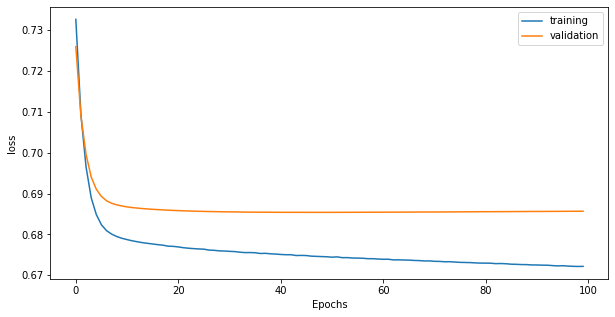

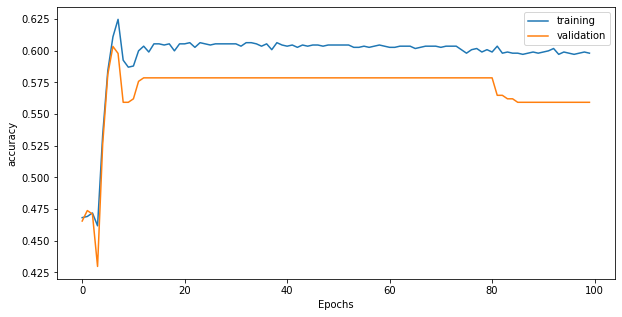

In [36]:
plot_history(res1.history, 'loss')
plot_history(res1.history, 'accuracy')

In [37]:
# Let's try a more complex model with two hidden layers and ReLU activation functions
clf2 = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(6,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile it
clf2.compile(
    # Stochastic gradient descent
    optimizer=keras.optimizers.SGD(learning_rate=0.01), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [38]:
# Train the model
res2 = clf2.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.5520 - val_loss: 0.6900 - val_accuracy: 0.5923
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5658 - val_loss: 0.6873 - val_accuracy: 0.5344
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5860 - val_loss: 0.6852 - val_accuracy: 0.5510
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5915 - val_loss: 0.6836 - val_accuracy: 0.5482
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5915 - val_loss: 0.6824 - val_accuracy: 0.5510
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5934 - val_loss: 0.6814 - val_accuracy: 0.5482
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.5823 - val_loss: 0.6806 - val_accuracy: 0.5372
Epoch 8/200
3

Epoch 59/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6479 - accuracy: 0.5943 - val_loss: 0.6647 - val_accuracy: 0.5565
Epoch 60/200
34/34 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.6026 - val_loss: 0.6645 - val_accuracy: 0.5565
Epoch 61/200
34/34 [==============================] - 0s 3ms/step - loss: 0.6471 - accuracy: 0.6007 - val_loss: 0.6642 - val_accuracy: 0.5647
Epoch 62/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6081 - val_loss: 0.6639 - val_accuracy: 0.5647
Epoch 63/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6463 - accuracy: 0.6118 - val_loss: 0.6636 - val_accuracy: 0.5647
Epoch 64/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6459 - accuracy: 0.6127 - val_loss: 0.6633 - val_accuracy: 0.5647
Epoch 65/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6455 - accuracy: 0.6118 - val_loss: 0.6630 - val_accuracy: 0.5647
Epoch 

34/34 [==============================] - 0s 3ms/step - loss: 0.6252 - accuracy: 0.6017 - val_loss: 0.6481 - val_accuracy: 0.5510
Epoch 117/200
34/34 [==============================] - 0s 3ms/step - loss: 0.6247 - accuracy: 0.6007 - val_loss: 0.6479 - val_accuracy: 0.5510
Epoch 118/200
34/34 [==============================] - 0s 3ms/step - loss: 0.6245 - accuracy: 0.5998 - val_loss: 0.6477 - val_accuracy: 0.5510
Epoch 119/200
34/34 [==============================] - 0s 3ms/step - loss: 0.6240 - accuracy: 0.5989 - val_loss: 0.6478 - val_accuracy: 0.5510
Epoch 120/200
34/34 [==============================] - 0s 3ms/step - loss: 0.6237 - accuracy: 0.5989 - val_loss: 0.6472 - val_accuracy: 0.5510
Epoch 121/200
34/34 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.5989 - val_loss: 0.6474 - val_accuracy: 0.5510
Epoch 122/200
34/34 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.5998 - val_loss: 0.6467 - val_accuracy: 0.5510
Epoch 123/200

34/34 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.6026 - val_loss: 0.6388 - val_accuracy: 0.5702
Epoch 174/200
34/34 [==============================] - 0s 3ms/step - loss: 0.6096 - accuracy: 0.6035 - val_loss: 0.6375 - val_accuracy: 0.5758
Epoch 175/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.6053 - val_loss: 0.6372 - val_accuracy: 0.5758
Epoch 176/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.6026 - val_loss: 0.6374 - val_accuracy: 0.5702
Epoch 177/200
34/34 [==============================] - 0s 3ms/step - loss: 0.6090 - accuracy: 0.6026 - val_loss: 0.6370 - val_accuracy: 0.5702
Epoch 178/200
34/34 [==============================] - 0s 3ms/step - loss: 0.6086 - accuracy: 0.6035 - val_loss: 0.6368 - val_accuracy: 0.5758
Epoch 179/200
34/34 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.6044 - val_loss: 0.6371 - val_accuracy: 0.5758
Epoch 180/200

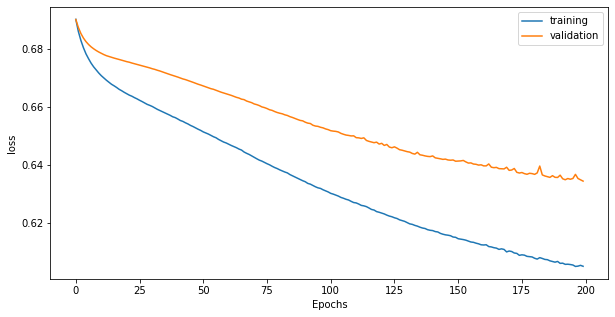

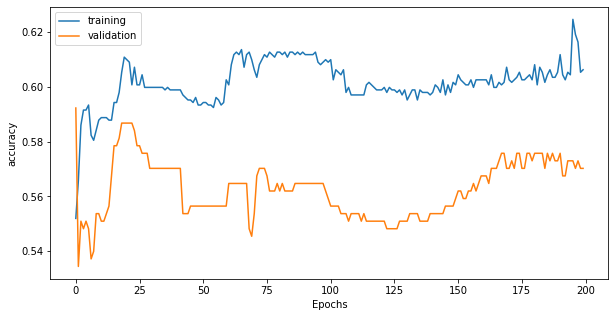

In [39]:
plot_history(res2.history, 'loss')
plot_history(res2.history, 'accuracy')

In [40]:
# Even larger model
clf3 = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(6,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile it
clf3.compile(
    # Different optimizer this time
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [41]:
res3 = clf3.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=400)

Epoch 1/400
34/34 [==============================] - 0s 5ms/step - loss: 0.6713 - accuracy: 0.5869 - val_loss: 0.6702 - val_accuracy: 0.5702
Epoch 2/400
34/34 [==============================] - 0s 3ms/step - loss: 0.6501 - accuracy: 0.6017 - val_loss: 0.6634 - val_accuracy: 0.5592
Epoch 3/400
34/34 [==============================] - 0s 3ms/step - loss: 0.6423 - accuracy: 0.6017 - val_loss: 0.6546 - val_accuracy: 0.6474
Epoch 4/400
34/34 [==============================] - 0s 3ms/step - loss: 0.6316 - accuracy: 0.6072 - val_loss: 0.6468 - val_accuracy: 0.5482
Epoch 5/400
34/34 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.6182 - val_loss: 0.6384 - val_accuracy: 0.6501
Epoch 6/400
34/34 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.6311 - val_loss: 0.6336 - val_accuracy: 0.6529
Epoch 7/400
34/34 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.6237 - val_loss: 0.6340 - val_accuracy: 0.6474
Epoch 8/400
3

Epoch 59/400
34/34 [==============================] - 0s 4ms/step - loss: 0.5248 - accuracy: 0.7249 - val_loss: 0.6066 - val_accuracy: 0.6612
Epoch 60/400
34/34 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.6964 - val_loss: 0.5819 - val_accuracy: 0.7466
Epoch 61/400
34/34 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.7194 - val_loss: 0.5715 - val_accuracy: 0.7245
Epoch 62/400
34/34 [==============================] - 0s 3ms/step - loss: 0.5322 - accuracy: 0.7010 - val_loss: 0.5787 - val_accuracy: 0.6832
Epoch 63/400
34/34 [==============================] - 0s 2ms/step - loss: 0.5198 - accuracy: 0.7102 - val_loss: 0.5806 - val_accuracy: 0.7383
Epoch 64/400
34/34 [==============================] - 0s 3ms/step - loss: 0.5165 - accuracy: 0.7332 - val_loss: 0.5764 - val_accuracy: 0.7052
Epoch 65/400
34/34 [==============================] - 0s 3ms/step - loss: 0.5193 - accuracy: 0.7231 - val_loss: 0.5780 - val_accuracy: 0.7328
Epoch 

34/34 [==============================] - 0s 4ms/step - loss: 0.4767 - accuracy: 0.7443 - val_loss: 0.5869 - val_accuracy: 0.7383
Epoch 117/400
34/34 [==============================] - 0s 4ms/step - loss: 0.4844 - accuracy: 0.7562 - val_loss: 0.5770 - val_accuracy: 0.7328
Epoch 118/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.7424 - val_loss: 0.5811 - val_accuracy: 0.7493
Epoch 119/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.7544 - val_loss: 0.5863 - val_accuracy: 0.7355
Epoch 120/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4837 - accuracy: 0.7415 - val_loss: 0.6178 - val_accuracy: 0.6722
Epoch 121/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4881 - accuracy: 0.7351 - val_loss: 0.5748 - val_accuracy: 0.7300
Epoch 122/400
34/34 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7397 - val_loss: 0.5859 - val_accuracy: 0.7521
Epoch 123/400

34/34 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.7553 - val_loss: 0.6041 - val_accuracy: 0.6942
Epoch 174/400
34/34 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7571 - val_loss: 0.5769 - val_accuracy: 0.7493
Epoch 175/400
34/34 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.7626 - val_loss: 0.6127 - val_accuracy: 0.7273
Epoch 176/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4565 - accuracy: 0.7728 - val_loss: 0.5895 - val_accuracy: 0.7300
Epoch 177/400
34/34 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.7553 - val_loss: 0.6005 - val_accuracy: 0.7328
Epoch 178/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4573 - accuracy: 0.7617 - val_loss: 0.5833 - val_accuracy: 0.7438
Epoch 179/400
34/34 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.7608 - val_loss: 0.5805 - val_accuracy: 0.7466
Epoch 180/400

34/34 [==============================] - 0s 4ms/step - loss: 0.4613 - accuracy: 0.7479 - val_loss: 0.6239 - val_accuracy: 0.7410
Epoch 231/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.7608 - val_loss: 0.5950 - val_accuracy: 0.7603
Epoch 232/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4579 - accuracy: 0.7571 - val_loss: 0.6288 - val_accuracy: 0.7438
Epoch 233/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4495 - accuracy: 0.7718 - val_loss: 0.6033 - val_accuracy: 0.7493
Epoch 234/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4431 - accuracy: 0.7663 - val_loss: 0.6191 - val_accuracy: 0.7410
Epoch 235/400
34/34 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.7672 - val_loss: 0.5990 - val_accuracy: 0.7548
Epoch 236/400
34/34 [==============================] - 0s 4ms/step - loss: 0.4428 - accuracy: 0.7645 - val_loss: 0.6029 - val_accuracy: 0.7438
Epoch 237/400

34/34 [==============================] - 0s 3ms/step - loss: 0.4347 - accuracy: 0.7682 - val_loss: 0.6215 - val_accuracy: 0.7576
Epoch 288/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4481 - accuracy: 0.7691 - val_loss: 0.6211 - val_accuracy: 0.7603
Epoch 289/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4507 - accuracy: 0.7553 - val_loss: 0.6326 - val_accuracy: 0.7383
Epoch 290/400
34/34 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.7737 - val_loss: 0.6337 - val_accuracy: 0.7493
Epoch 291/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4431 - accuracy: 0.7709 - val_loss: 0.6253 - val_accuracy: 0.7466
Epoch 292/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.7433 - val_loss: 0.6725 - val_accuracy: 0.7273
Epoch 293/400
34/34 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.7737 - val_loss: 0.6255 - val_accuracy: 0.7521
Epoch 294/400

34/34 [==============================] - 0s 3ms/step - loss: 0.4373 - accuracy: 0.7663 - val_loss: 0.6400 - val_accuracy: 0.7576
Epoch 345/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.7801 - val_loss: 0.6425 - val_accuracy: 0.7686
Epoch 346/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.7654 - val_loss: 0.6427 - val_accuracy: 0.7603
Epoch 347/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4321 - accuracy: 0.7847 - val_loss: 0.6493 - val_accuracy: 0.7603
Epoch 348/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.7764 - val_loss: 0.6580 - val_accuracy: 0.7438
Epoch 349/400
34/34 [==============================] - 0s 3ms/step - loss: 0.4330 - accuracy: 0.7755 - val_loss: 0.6611 - val_accuracy: 0.7383
Epoch 350/400
34/34 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.7663 - val_loss: 0.6434 - val_accuracy: 0.7576
Epoch 351/400

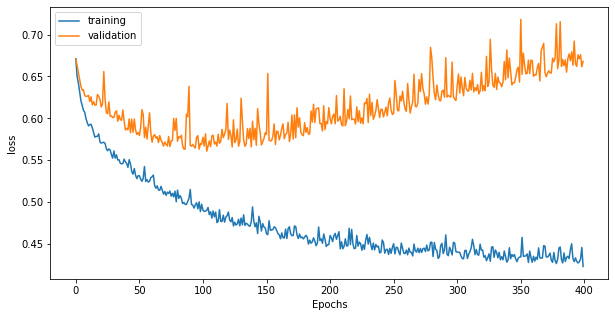

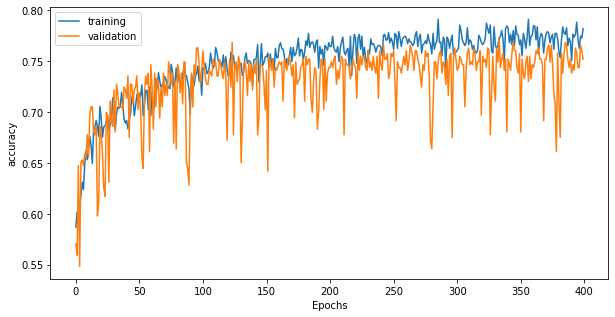

In [42]:
plot_history(res3.history, 'loss')
plot_history(res3.history, 'accuracy')

In [43]:
# Model performance with test dataset
clf1.evaluate(X_test, y_test)
clf2.evaluate(X_test, y_test)
clf3.evaluate(X_test, y_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.5955 - accuracy: 0.8017


[0.5955265164375305, 0.8016529083251953]

In [44]:
# Model parameter counts
print(f'Model #1: {clf1.count_params()}')
print(f'Model #2: {clf2.count_params()}')
print(f'Model #3: {clf3.count_params()}')

Model #1: 81
Model #2: 581
Model #3: 10901


In [47]:
clf3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               700       
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 10,901
Trainable params: 10,901
Non-trainable params: 0
_________________________________________________________________


# Regression

Same regression problem as in previous regression tutorial - predicting orbital period based on 4 features: perigee, apogee, eccentricity and inclination.

Linear regression model (non-regularized) performance:

Training error:\
MAE: 88.93722331809948\
MSE: 27936.489759789732\
RMSE: 167.14212443244142\
R2: 0.923603439111813

Test error:\
MAE: 86.67793658056634\
MSE: 28510.53400875772\
RMSE: 168.8506263203004\
R2: 0.9188295320575284

## Data preparation

In [49]:
def outliers_iqr(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    outliers = ((df[[feature]] < (q1 - 1.5 * iqr)) |(df[[feature]] > (q3 + 1.5 * iqr))).any(axis=1)
    return outliers

non_outliers = ~outliers_iqr(df, 'Apogee (km)')
df_filtered2 = df[non_outliers].reset_index()

# Train/test/validation split: 60%/20%/20%
train_indexes2, test_indexes2 = train_test_split(df_filtered2.index, test_size=0.2, random_state=100)
train_indexes2, val_indexes2 = train_test_split(train_indexes, test_size=0.25, random_state=101)

mlr_features = ['Perigee (km)', 'Apogee (km)', 'Eccentricity', 'Inclination (degrees)']
X2 = df_filtered2[mlr_features].values
X2 = StandardScaler().fit_transform(X2)
X2_train, X2_test, X2_val = X2[train_indexes2], X2[test_indexes2], X2[val_indexes2]

y2 = df_filtered2['Period (minutes)'].values.reshape(-1, 1)
y2_train, y2_test, y2_val = y2[train_indexes2], y2[test_indexes2], y2[val_indexes2]

## Model training and evaluation

In [50]:
# One of the models from previous classification experiments
reg1 = keras.Sequential([
    keras.layers.Dense(10, activation='sigmoid', input_shape=(4,)),
    # Note that sigmoid activation function is not used in the output layer!
    keras.layers.Dense(1)
])

# Compile it
reg1.compile(
    optimizer='sgd',
    loss='mse', 
    metrics=['mae'])

In [51]:
# Train the model
reg_res1 = reg1.fit(
    X2_train, y2_train, 
    validation_data=(X2_val, y2_val), 
    epochs=100)

Epoch 1/100
26/26 [==============================] - 0s 6ms/step - loss: 222191.7031 - mae: 285.3277 - val_loss: 68475.4766 - val_mae: 189.5753
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 47356.1211 - mae: 143.6250 - val_loss: 34221.5000 - val_mae: 113.3165
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 46504.8828 - mae: 130.4155 - val_loss: 42299.5703 - val_mae: 134.4523
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 49499.6914 - mae: 134.3560 - val_loss: 37966.1406 - val_mae: 121.5364
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 49320.2344 - mae: 129.4421 - val_loss: 39558.6406 - val_mae: 114.4446
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 44633.4219 - mae: 118.3883 - val_loss: 32167.6133 - val_mae: 100.5742
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 39553.4414 - mae: 104.6472 - val_loss: 31383.3574 - val_mae: 96.0129

26/26 [==============================] - 0s 3ms/step - loss: 28761.9707 - mae: 69.4341 - val_loss: 27290.5020 - val_mae: 66.7760
Epoch 59/100
26/26 [==============================] - 0s 3ms/step - loss: 28736.6133 - mae: 67.6617 - val_loss: 27443.4395 - val_mae: 69.1385
Epoch 60/100
26/26 [==============================] - 0s 3ms/step - loss: 28699.2539 - mae: 68.4549 - val_loss: 27470.1484 - val_mae: 69.1528
Epoch 61/100
26/26 [==============================] - 0s 3ms/step - loss: 28650.8262 - mae: 67.5639 - val_loss: 27536.1660 - val_mae: 69.8623
Epoch 62/100
26/26 [==============================] - 0s 4ms/step - loss: 28655.5039 - mae: 68.4674 - val_loss: 27380.1953 - val_mae: 66.5833
Epoch 63/100
26/26 [==============================] - 0s 3ms/step - loss: 28568.4883 - mae: 66.5224 - val_loss: 27576.0020 - val_mae: 69.6568
Epoch 64/100
26/26 [==============================] - 0s 3ms/step - loss: 28554.5801 - mae: 68.3731 - val_loss: 27439.5527 - val_mae: 66.8583
Epoch 65/100
26/26 

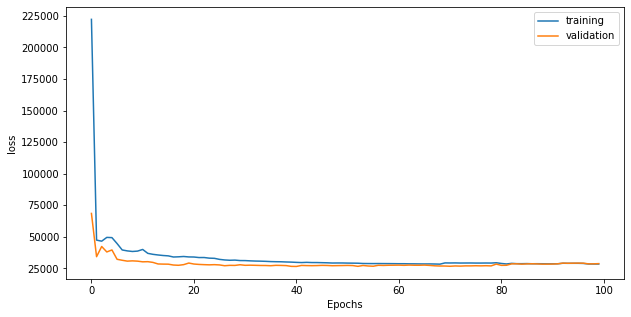

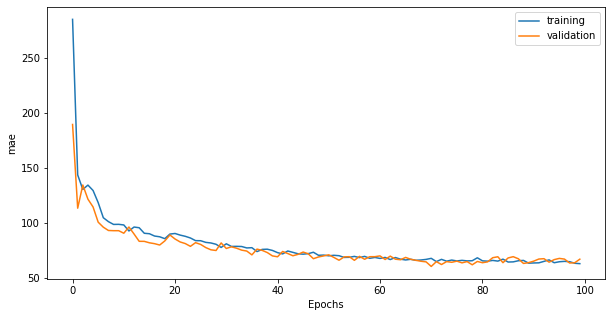

In [52]:
plot_history(reg_res1.history, 'loss')
plot_history(reg_res1.history, 'mae')

In [53]:
reg1.evaluate(X2_test, y2_test)

13/13 [==============================] - 0s 2ms/step - loss: 17543.9492 - mae: 47.7328


[17543.94921875, 47.73280715942383]

# More ideas

- Different neural network architectures (number of hidden layers and neurons, activation functions, etc)
- Different optimizers and/or their parameters (i.e. learning rate)
- Different loss functions and metrics
- Layer weight initialization (all zeros, random normal, random uniform, etc)
- Multiclass classification - make sure you use one-hot encodings, and appropriate loss function (i.e. categorical cross-entropy) and output layer activation functions (softmax)